# **Neural Network model**

**Loading the required packages**

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#IMPORTING THE IMDB DATASET
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])


9999

## **Decoding reviews back to text**


In [6]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


## **Preparing the data**

**Encoding the integer sequences via multi-hot encoding**

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")


## **Model 1- Hidden layers= 2, Nodes=16**

**Model** **definition**

In [8]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

## **Compiling the model**

In [9]:
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])




## **setting up the validation set and training set**


In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

**Training your model**

In [15]:

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 89ms/step - loss: 0.5070 - accuracy: 0.7969 - val_loss: 0.4075 - val_accuracy: 0.8645
Epoch 2/20
30/30 [==============================] - 2s 54ms/step - loss: 0.3444 - accuracy: 0.8910 - val_loss: 0.3360 - val_accuracy: 0.8791
Epoch 3/20
30/30 [==============================] - 1s 41ms/step - loss: 0.2752 - accuracy: 0.9123 - val_loss: 0.3019 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2322 - accuracy: 0.9248 - val_loss: 0.2953 - val_accuracy: 0.8805
Epoch 5/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2020 - accuracy: 0.9349 - val_loss: 0.2799 - val_accuracy: 0.8869
Epoch 6/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1772 - accuracy: 0.9457 - val_loss: 0.2723 - val_accuracy: 0.8881
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1588 - accuracy: 0.9519 - val_loss: 0.2782 - val_accuracy: 0.8869
Epoch 8/20
30

In [37]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

**Plotting the training and validation loss**

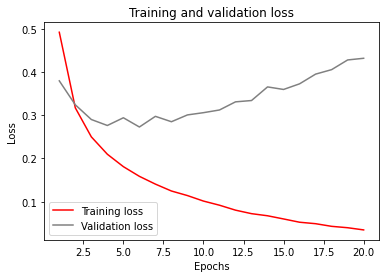

In [38]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "r", label="Training loss")
plt.plot(epochs, val_loss_values, "grey", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

**Plotting the training and validation accuracy**

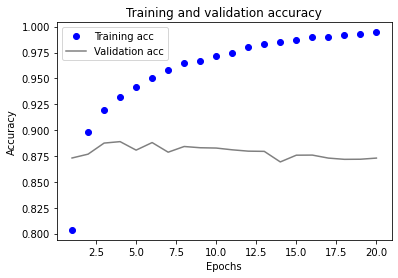

In [39]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "grey", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


**Retraining a model from scratch with epochs=4**

In [35]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
49/49 [==============================] - 2s 34ms/step - loss: 0.4789 - accuracy: 0.8064
Epoch 2/4
49/49 [==============================] - 2s 42ms/step - loss: 0.2772 - accuracy: 0.9026
Epoch 3/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2159 - accuracy: 0.9232
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3028 - accuracy: 0.8781


In [36]:
results=model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.3028 - accuracy: 0.8781


**The first model built had an accuracy on the test set of 87.81%.**

### **Using a trained model to generate predictions on new data**

In [37]:
model.predict(x_test)

782/782 [==============================] - 2s 2ms/step


array([[0.14736892],
       [0.9995899 ],
       [0.57310694],
       ...,
       [0.07394038],
       [0.04948555],
       [0.32760125]], dtype=float32)

## **MODEL 2 - 1 hidden layer 64 nodes**

In [34]:
model = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history2 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 5s 155ms/step - loss: 0.1657 - accuracy: 0.7744 - val_loss: 0.1237 - val_accuracy: 0.8481
Epoch 2/50
30/30 [==============================] - 2s 72ms/step - loss: 0.0975 - accuracy: 0.8867 - val_loss: 0.1042 - val_accuracy: 0.8633
Epoch 3/50
30/30 [==============================] - 2s 69ms/step - loss: 0.0805 - accuracy: 0.9023 - val_loss: 0.0912 - val_accuracy: 0.8804
Epoch 4/50
30/30 [==============================] - 2s 62ms/step - loss: 0.0677 - accuracy: 0.9186 - val_loss: 0.0841 - val_accuracy: 0.8899
Epoch 5/50
30/30 [==============================] - 2s 63ms/step - loss: 0.0590 - accuracy: 0.9295 - val_loss: 0.0993 - val_accuracy: 0.8628
Epoch 6/50
30/30 [==============================] - 3s 95ms/step - loss: 0.0541 - accuracy: 0.9359 - val_loss: 0.0848 - val_accuracy: 0.8856
Epoch 7/50
30/30 [==============================] - 3s 83ms/step - loss: 0.0479 - accuracy: 0.9451 - val_loss: 0.0987 - val_accuracy: 0.8643
Epoch 8/50
3

In [35]:
history_dict_2 = history2.history

**Plotting the training and validation loss**

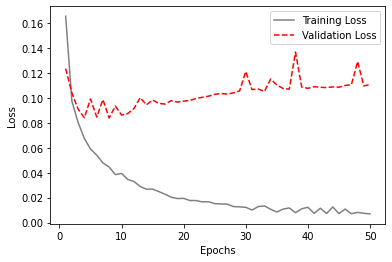

In [36]:
loss = history_dict_2['loss']
val_loss = history_dict_2['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs, loss, color= "grey", label= "Training Loss")
plt.plot(epochs, val_loss, color= "red",linestyle= "dashed", label= "Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

The validation loss begins to take a spike after the third epoch, so based on the loss graph above, we can determine that "3" is the appropriate number of epochs.

**plotting the training and validation** **accuracy**

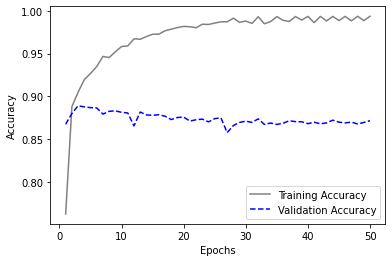

In [42]:
accuracy = history_dict_2['accuracy']
validation_accuracy = history_dict_2['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color="grey",label="Training Accuracy")
plt.plot(epochs,validation_accuracy, color= "blue", linestyle="dashed",label="Validation Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

Even from the accuracy graph we can say that the accuracy was highest at epoch=3

**Retraining a model from scratch with epochs=3**

In [43]:
model = keras.Sequential([
    layers.Dense(64,activation='tanh',input_shape=(10000,)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history_3 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=512)             
     

Epoch 1/3
49/49 [==============================] - 3s 48ms/step - loss: 0.1458 - accuracy: 0.8048
Epoch 2/3
49/49 [==============================] - 2s 48ms/step - loss: 0.0852 - accuracy: 0.8938
Epoch 3/3
49/49 [==============================] - 4s 73ms/step - loss: 0.0722 - accuracy: 0.9077


In [44]:
results2= model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.0847 - accuracy: 0.8862


**The second model built had an accuracy on the test set of 88.62%.**

## **MODEL 3 - 3 hidden layer 64 nodes**

In [45]:
from tensorflow import keras
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history3 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data = (x_val,y_val))

Epoch 1/50
30/30 [==============================] - 4s 100ms/step - loss: 0.7735 - accuracy: 0.7251 - val_loss: 0.5606 - val_accuracy: 0.8687
Epoch 2/50
30/30 [==============================] - 2s 64ms/step - loss: 0.5084 - accuracy: 0.8767 - val_loss: 0.4649 - val_accuracy: 0.8894
Epoch 3/50
30/30 [==============================] - 2s 72ms/step - loss: 0.4173 - accuracy: 0.9039 - val_loss: 0.4657 - val_accuracy: 0.8769
Epoch 4/50
30/30 [==============================] - 2s 63ms/step - loss: 0.3668 - accuracy: 0.9179 - val_loss: 0.4468 - val_accuracy: 0.8798
Epoch 5/50
30/30 [==============================] - 2s 64ms/step - loss: 0.3108 - accuracy: 0.9408 - val_loss: 0.4416 - val_accuracy: 0.8796
Epoch 6/50
30/30 [==============================] - 3s 106ms/step - loss: 0.2928 - accuracy: 0.9391 - val_loss: 0.4770 - val_accuracy: 0.8714
Epoch 7/50
30/30 [==============================] - 2s 67ms/step - loss: 0.2655 - accuracy: 0.9509 - val_loss: 0.4718 - val_accuracy: 0.8661
Epoch 8/50


In [46]:
history_dict_3 = history3.history

**plotting the training and validation loss**

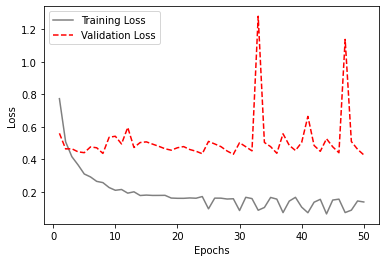

In [47]:
loss = history_dict_3['loss']
val_loss = history_dict_3['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='red',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The validation loss begins to take a spike after the third epoch, so based on the loss graph above, we can determine that "3" is the appropriate number of epochs.

**plotting the training and validation accuracy**

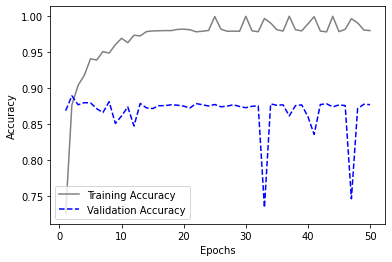

In [48]:
accuracy = history_dict_3['accuracy']
val_accuracy = history_dict_3['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The "Accuracy Plot" confirms the same thing; here, the accuracy peaked at the third epoch.

**Retraining a model from scratch with epochs=3**

In [49]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001),input_shape=(10000,)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(64,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_D3 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=512)
     

Epoch 1/3
49/49 [==============================] - 3s 51ms/step - loss: 0.6870 - accuracy: 0.7771
Epoch 2/3
49/49 [==============================] - 2s 50ms/step - loss: 0.4432 - accuracy: 0.8899
Epoch 3/3
49/49 [==============================] - 3s 59ms/step - loss: 0.3630 - accuracy: 0.9114


In [50]:
results3= model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.4290 - accuracy: 0.8738


**The** **third** **model built had an accuracy on the test set of 87.38%.**

## **Model-4 - 2 hidden layer 64 nodes**

In [40]:
model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history4 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=256,
                       validation_data=(x_val,y_val))

Epoch 1/50
59/59 [==============================] - 5s 61ms/step - loss: 0.5022 - accuracy: 0.7543 - val_loss: 0.3143 - val_accuracy: 0.8789
Epoch 2/50
59/59 [==============================] - 2s 38ms/step - loss: 0.2916 - accuracy: 0.8871 - val_loss: 0.2768 - val_accuracy: 0.8892
Epoch 3/50
59/59 [==============================] - 2s 40ms/step - loss: 0.2187 - accuracy: 0.9202 - val_loss: 0.2761 - val_accuracy: 0.8916
Epoch 4/50
59/59 [==============================] - 2s 40ms/step - loss: 0.1691 - accuracy: 0.9387 - val_loss: 0.2884 - val_accuracy: 0.8910
Epoch 5/50
59/59 [==============================] - 3s 55ms/step - loss: 0.1289 - accuracy: 0.9545 - val_loss: 0.3267 - val_accuracy: 0.8903
Epoch 6/50
59/59 [==============================] - 3s 45ms/step - loss: 0.1007 - accuracy: 0.9664 - val_loss: 0.3698 - val_accuracy: 0.8890
Epoch 7/50
59/59 [==============================] - 2s 40ms/step - loss: 0.0790 - accuracy: 0.9727 - val_loss: 0.4209 - val_accuracy: 0.8838
Epoch 8/50
59

In [41]:
history_dict_4 = history4.history
     

**plotting the training and validation loss**

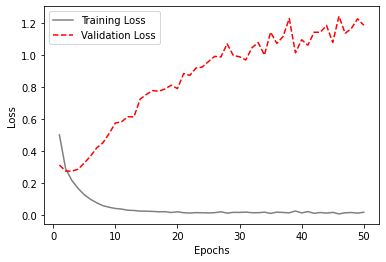

In [42]:
loss = history_dict_4['loss']
val_loss = history_dict_4['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='red',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The validation loss begins to take a spike after the third epoch, so based on the loss graph above, we can determine that "3" is the appropriate number of epochs.

**plotting the training and validation accuracy**

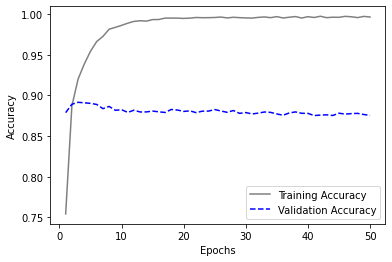

In [43]:
accuracy = history_dict_4['accuracy']
val_accuracy = history_dict_4['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


The "Accuracy Plot" confirms the same thing; here, the accuracy peaked at the third epoch.

**Retraining the model with 3 epochs**


In [44]:

model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(64,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history5 = model.fit(x_train,
                       y_train,
                       epochs=3,
                       batch_size=256)

Epoch 1/3
98/98 [==============================] - 5s 37ms/step - loss: 0.4404 - accuracy: 0.7991
Epoch 2/3
98/98 [==============================] - 3s 29ms/step - loss: 0.2615 - accuracy: 0.8988
Epoch 3/3
98/98 [==============================] - 3s 29ms/step - loss: 0.2079 - accuracy: 0.9243


In [45]:
results4 = model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 4ms/step - loss: 0.2964 - accuracy: 0.8844


**The fourth model built had an accuracy on the test set of 88.44%**

## **Model 5 - Hidden layers=1, Nodes=32**

In [46]:
model = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history6 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val,y_val))

Epoch 1/50
30/30 [==============================] - 3s 69ms/step - loss: 0.1583 - accuracy: 0.7943 - val_loss: 0.1085 - val_accuracy: 0.8722
Epoch 2/50
30/30 [==============================] - 1s 46ms/step - loss: 0.0815 - accuracy: 0.9119 - val_loss: 0.0902 - val_accuracy: 0.8892
Epoch 3/50
30/30 [==============================] - 1s 45ms/step - loss: 0.0604 - accuracy: 0.9367 - val_loss: 0.0857 - val_accuracy: 0.8887
Epoch 4/50
30/30 [==============================] - 1s 50ms/step - loss: 0.0482 - accuracy: 0.9531 - val_loss: 0.0837 - val_accuracy: 0.8884
Epoch 5/50
30/30 [==============================] - 2s 74ms/step - loss: 0.0393 - accuracy: 0.9641 - val_loss: 0.0839 - val_accuracy: 0.8865
Epoch 6/50
30/30 [==============================] - 2s 50ms/step - loss: 0.0329 - accuracy: 0.9725 - val_loss: 0.0844 - val_accuracy: 0.8846
Epoch 7/50
30/30 [==============================] - 1s 45ms/step - loss: 0.0274 - accuracy: 0.9784 - val_loss: 0.0859 - val_accuracy: 0.8818
Epoch 8/50
30

In [47]:
history_dict_5=history6.history

**plotting the training and validation loss**

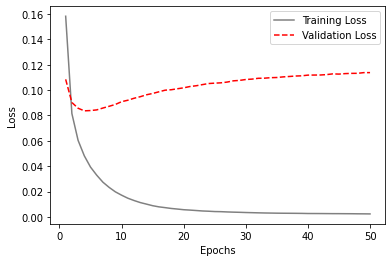

In [49]:
loss = history_dict_5['loss']
val_loss = history_dict_5['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='red',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We can determine the correct number of epochs to be "5" from the loss graph shown above because the validation loss begins to spike after the fifth epoch.

**plotting the training and validation accuracy**

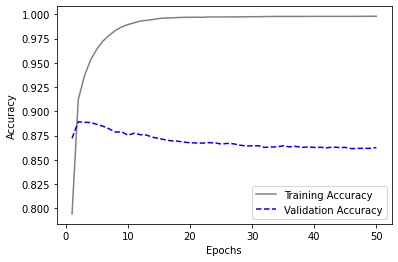

In [50]:
accuracy = history_dict_5['accuracy']
val_accuracy = history_dict_5['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

The "Accuracy Plot" confirms the same thing; here, the accuracy peaked at the fifth epoch.

**Retraining the model with 5 epochs**


In [51]:
model = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.3),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

history7 = model.fit(x_train,
                       y_train,
                       epochs=5,
                       batch_size=512)
     

Epoch 1/5
49/49 [==============================] - 2s 35ms/step - loss: 0.1377 - accuracy: 0.8294
Epoch 2/5
49/49 [==============================] - 2s 42ms/step - loss: 0.0733 - accuracy: 0.9162
Epoch 3/5
49/49 [==============================] - 2s 50ms/step - loss: 0.0563 - accuracy: 0.9369
Epoch 4/5
49/49 [==============================] - 2s 33ms/step - loss: 0.0470 - accuracy: 0.9500
Epoch 5/5
49/49 [==============================] - 2s 35ms/step - loss: 0.0394 - accuracy: 0.9599


In [52]:
results5 = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.0882 - accuracy: 0.8805


**The fifth built model's accuracy on the test set was 88.05%**

## **Model 6 - Hidden Layers=2, Nodes=16**

In [53]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history8 = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=30,
                        batch_size=512,
                        validation_data=(x_val,y_val))
     

Epoch 1/30
30/30 [==============================] - 5s 122ms/step - loss: 0.6276 - accuracy: 0.6396 - val_loss: 0.5039 - val_accuracy: 0.8494
Epoch 2/30
30/30 [==============================] - 2s 72ms/step - loss: 0.4984 - accuracy: 0.7723 - val_loss: 0.3961 - val_accuracy: 0.8731
Epoch 3/30
30/30 [==============================] - 1s 40ms/step - loss: 0.4197 - accuracy: 0.8259 - val_loss: 0.3328 - val_accuracy: 0.8772
Epoch 4/30
30/30 [==============================] - 2s 55ms/step - loss: 0.3554 - accuracy: 0.8660 - val_loss: 0.3006 - val_accuracy: 0.8862
Epoch 5/30
30/30 [==============================] - 2s 62ms/step - loss: 0.3094 - accuracy: 0.8847 - val_loss: 0.2853 - val_accuracy: 0.8869
Epoch 6/30
30/30 [==============================] - 1s 38ms/step - loss: 0.2670 - accuracy: 0.9071 - val_loss: 0.2765 - val_accuracy: 0.8888
Epoch 7/30
30/30 [==============================] - 1s 37ms/step - loss: 0.2403 - accuracy: 0.9197 - val_loss: 0.2798 - val_accuracy: 0.8873
Epoch 8/30
3

In [54]:
history_dict_6= history8.history

**plotting the training and validation loss**

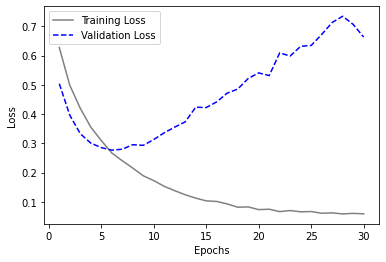

In [55]:
loss=history_dict_6['loss']
val_loss=history_dict_6['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='red',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The validation loss begins to take a spike after the seventh epoch, so based on the loss graph above, we can determine that "7" is the appropriate number of epochs.

**plotting the training and validation accuracy**

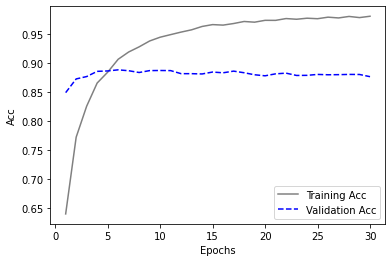

In [56]:
accuracy=history_dict_6['accuracy']
val_accuracy=history_dict_6['val_accuracy']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Acc')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()
     

The "Accuracy Plot" confirms the same thing; here, the accuracy peaked at the seventh epoch.

**Retraining the model with 7 epochs**

In [16]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history9 = model.fit(x_train,
                        y_train,
                        epochs=7,
                        batch_size=512)

Epoch 1/7
49/49 [==============================] - 2s 32ms/step - loss: 0.6111 - accuracy: 0.6588
Epoch 2/7
49/49 [==============================] - 1s 29ms/step - loss: 0.4606 - accuracy: 0.7946
Epoch 3/7
49/49 [==============================] - 1s 30ms/step - loss: 0.3741 - accuracy: 0.8466
Epoch 4/7
49/49 [==============================] - 2s 31ms/step - loss: 0.3223 - accuracy: 0.8758
Epoch 5/7
49/49 [==============================] - 2s 44ms/step - loss: 0.2810 - accuracy: 0.8953
Epoch 6/7
49/49 [==============================] - 2s 35ms/step - loss: 0.2552 - accuracy: 0.9043
Epoch 7/7
49/49 [==============================] - 1s 29ms/step - loss: 0.2273 - accuracy: 0.9124


In [17]:
results6= model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.2896 - accuracy: 0.8858


**The sixth built model's accuracy on the test set was 88.58%**

## **Model-7 Hidden Layers=2 Nodes=16**

In [22]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.4),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history10 = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.6154 - accuracy: 0.6611 - val_loss: 0.4838 - val_accuracy: 0.8549
Epoch 2/20
30/30 [==============================] - 1s 41ms/step - loss: 0.4725 - accuracy: 0.8027 - val_loss: 0.3845 - val_accuracy: 0.8767
Epoch 3/20
30/30 [==============================] - 2s 64ms/step - loss: 0.3867 - accuracy: 0.8549 - val_loss: 0.3263 - val_accuracy: 0.8779
Epoch 4/20
30/30 [==============================] - 4s 150ms/step - loss: 0.3265 - accuracy: 0.8821 - val_loss: 0.2903 - val_accuracy: 0.8888
Epoch 5/20
30/30 [==============================] - 2s 53ms/step - loss: 0.2806 - accuracy: 0.9043 - val_loss: 0.2810 - val_accuracy: 0.8834
Epoch 6/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2384 - accuracy: 0.9203 - val_loss: 0.2842 - val_accuracy: 0.8848
Epoch 7/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2121 - accuracy: 0.9309 - val_loss: 0.2872 - val_accuracy: 0.8836
Epoch 8/20
3

In [23]:
history_dict_7= history10.history

**plotting the training and validation loss**

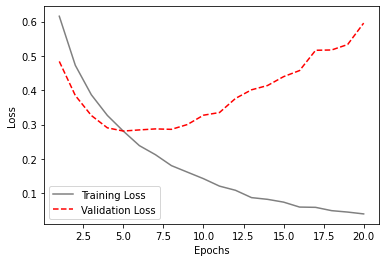

In [37]:
loss=history_dict_7['loss']
val_loss=history_dict_7['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='red',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
     

We can determine the correct number of epochs to be "4" from the loss graph shown above because the validation loss begins to spike after the fourth epoch.

**plotting the training and validation accuracy**

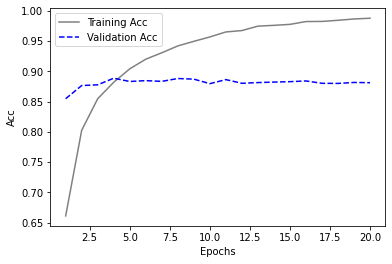

In [38]:
accuracy=history_dict_7['accuracy']
val_accuracy=history_dict_7['val_accuracy']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Acc')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()
     


The "Accuracy Plot" confirms the same thing; here, the accuracy peaked at the fourth epoch.

**Retraining the model with 4 epochs**


In [39]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,)),
    layers.Dropout(rate=0.4),
    layers.Dense(16,activation='relu'),
    layers.Dropout(rate=0.4),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history11 = model.fit(x_train,
                        y_train,
                        epochs=4,
                        batch_size=512)

Epoch 1/4
49/49 [==============================] - 2s 32ms/step - loss: 0.5596 - accuracy: 0.7261
Epoch 2/4
49/49 [==============================] - 2s 42ms/step - loss: 0.3897 - accuracy: 0.8491
Epoch 3/4
49/49 [==============================] - 2s 36ms/step - loss: 0.3067 - accuracy: 0.8884
Epoch 4/4
49/49 [==============================] - 1s 30ms/step - loss: 0.2555 - accuracy: 0.9109


In [40]:
results7= model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.2740 - accuracy: 0.8891


**The seventh built model's accuracy on the test set was 88.91%.**

## **Model 8 - Hidden Layers=2 Nodes=16**

In [42]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history12 = model.fit(partial_x_train,
                        partial_y_train,
                        epochs=20,
                        batch_size=512,
                        validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 60ms/step - loss: 0.5795 - accuracy: 0.7803 - val_loss: 0.4540 - val_accuracy: 0.8644
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3848 - accuracy: 0.8890 - val_loss: 0.3793 - val_accuracy: 0.8747
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3055 - accuracy: 0.9147 - val_loss: 0.3621 - val_accuracy: 0.8723
Epoch 4/20
30/30 [==============================] - 1s 39ms/step - loss: 0.2634 - accuracy: 0.9287 - val_loss: 0.3459 - val_accuracy: 0.8813
Epoch 5/20
30/30 [==============================] - 2s 61ms/step - loss: 0.2365 - accuracy: 0.9378 - val_loss: 0.3365 - val_accuracy: 0.8862
Epoch 6/20
30/30 [==============================] - 2s 50ms/step - loss: 0.2165 - accuracy: 0.9463 - val_loss: 0.3349 - val_accuracy: 0.8847
Epoch 7/20
30/30 [==============================] - 1s 37ms/step - loss: 0.2081 - accuracy: 0.9501 - val_loss: 0.3429 - val_accuracy: 0.8842
Epoch 8/20
30

In [43]:
history_dict_8 = history12.history

**plotting the training and validation loss**

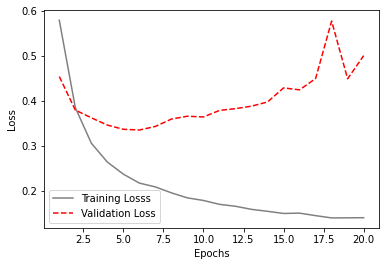

In [45]:
loss=history_dict_8['loss']
val_loss=history_dict_8['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Losss')
plt.plot(epochs,val_loss,color='red',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The validation loss begins to take a spike after the sixth epoch, so based on the loss graph above, we can determine that "6" is the appropriate number of epochs.

**plotting the training and validation accuracy**

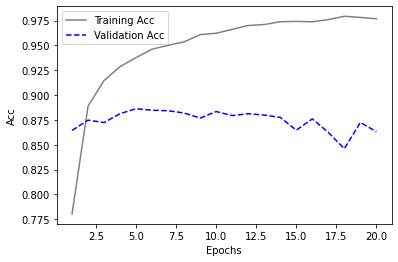

In [46]:
accuracy=history_dict_8['accuracy']
val_accuracy=history_dict_8['val_accuracy']
epochs=range(1,len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Acc')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()
plt.show()

The "Accuracy Plot" confirms the same thing; here, the accuracy peaked at the sixth epoch.

**Retraining the model with 6 epochs**

> Indented block



In [47]:
model = keras.Sequential([
    layers.Dense(16,activation='relu',input_shape=(10000,),kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(16,activation='relu',kernel_regularizer=regularizers.l2(0.001)),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history13 = model.fit(x_train,
                        y_train,
                        epochs=6,
                        batch_size=512)

Epoch 1/6
49/49 [==============================] - 2s 33ms/step - loss: 0.6021 - accuracy: 0.7424
Epoch 2/6
49/49 [==============================] - 1s 28ms/step - loss: 0.4147 - accuracy: 0.8865
Epoch 3/6
49/49 [==============================] - 1s 29ms/step - loss: 0.3076 - accuracy: 0.9165
Epoch 4/6
49/49 [==============================] - 1s 30ms/step - loss: 0.2651 - accuracy: 0.9270
Epoch 5/6
49/49 [==============================] - 1s 29ms/step - loss: 0.2441 - accuracy: 0.9340
Epoch 6/6
49/49 [==============================] - 2s 31ms/step - loss: 0.2311 - accuracy: 0.9394


In [48]:
results8= model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.3696 - accuracy: 0.8721


**The test set accuracy for the Model 8 was 87.21**

## **Model 9 Hidden Layers= 2 , nodes=32**

In [11]:
from keras.models import Sequential
from keras.layers import Dense
model = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(32,activation='tanh'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['accuracy'])

history14 = model.fit(partial_x_train,
                       partial_y_train,
                       epochs=50,
                       batch_size=512,
                       validation_data=(x_val,y_val))
     

Epoch 1/50
30/30 [==============================] - 3s 73ms/step - loss: 0.1733 - accuracy: 0.7505 - val_loss: 0.1113 - val_accuracy: 0.8592
Epoch 2/50
30/30 [==============================] - 1s 47ms/step - loss: 0.0987 - accuracy: 0.8779 - val_loss: 0.0912 - val_accuracy: 0.8762
Epoch 3/50
30/30 [==============================] - 2s 51ms/step - loss: 0.0766 - accuracy: 0.9024 - val_loss: 0.0833 - val_accuracy: 0.8859
Epoch 4/50
30/30 [==============================] - 2s 78ms/step - loss: 0.0637 - accuracy: 0.9196 - val_loss: 0.0825 - val_accuracy: 0.8874
Epoch 5/50
30/30 [==============================] - 2s 56ms/step - loss: 0.0557 - accuracy: 0.9305 - val_loss: 0.0944 - val_accuracy: 0.8741
Epoch 6/50
30/30 [==============================] - 1s 46ms/step - loss: 0.0487 - accuracy: 0.9397 - val_loss: 0.0867 - val_accuracy: 0.8832
Epoch 7/50
30/30 [==============================] - 1s 46ms/step - loss: 0.0450 - accuracy: 0.9438 - val_loss: 0.0883 - val_accuracy: 0.8835
Epoch 8/50
30

In [15]:
history_dict_9= history14.history

**plotting the training and validation loss**

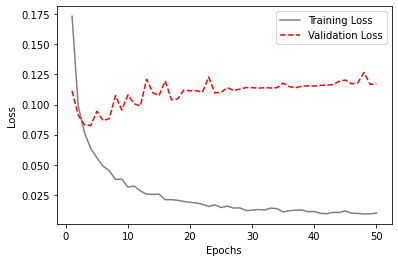

In [19]:
loss = history_dict_9['loss']
val_loss = history_dict_9['val_loss']
epochs = range(1, len(loss)+1)
plt.plot(epochs,loss,color='grey',label='Training Loss')
plt.plot(epochs,val_loss,color='red',linestyle='dashed',label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

The validation loss begins to take a spike after the fifth epoch, so based on the loss graph above, we can determine that "6" is the appropriate number of epochs.

**plotting the training and validation accuracy**

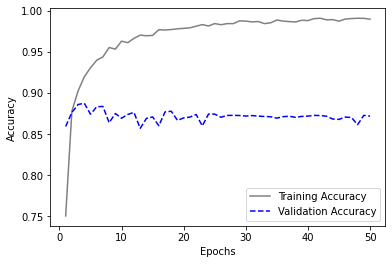

In [20]:
accuracy = history_dict_9['accuracy']
val_accuracy = history_dict_9['val_accuracy']
epochs = range(1, len(accuracy)+1)
plt.plot(epochs,accuracy,color='grey',label='Training Accuracy')
plt.plot(epochs,val_accuracy,color='blue',linestyle='dashed',label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
     

The "Accuracy Plot" confirms the same thing; here, the accuracy peaked at the fifth epoch.

**Retraining the model with 5 epochs**

In [22]:
model = keras.Sequential([
    layers.Dense(32,activation='tanh',input_shape=(10000,)),
    layers.Dropout(rate=0.5),
    layers.Dense(32,activation='tanh'),
    layers.Dropout(rate=0.5),
    layers.Dense(1,activation='sigmoid')
])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

imdb_mod_7 = model.fit(x_train,
                       y_train,
                       epochs=5,
                       batch_size=512)
     

Epoch 1/5
49/49 [==============================] - 2s 37ms/step - loss: 0.4365 - accuracy: 0.8020
Epoch 2/5
49/49 [==============================] - 2s 36ms/step - loss: 0.2733 - accuracy: 0.8954
Epoch 3/5
49/49 [==============================] - 2s 36ms/step - loss: 0.2288 - accuracy: 0.9136
Epoch 4/5
49/49 [==============================] - 2s 48ms/step - loss: 0.2033 - accuracy: 0.9252
Epoch 5/5
49/49 [==============================] - 3s 51ms/step - loss: 0.1809 - accuracy: 0.9339


In [23]:
results9= model.evaluate(x_test,y_test)

782/782 [==============================] - 3s 3ms/step - loss: 0.3143 - accuracy: 0.8810


**The test set accuracy for the Model 9 is 88.10**

## ***Evaluating the performance of nine different neural network models trained on the IMDB dataset ***

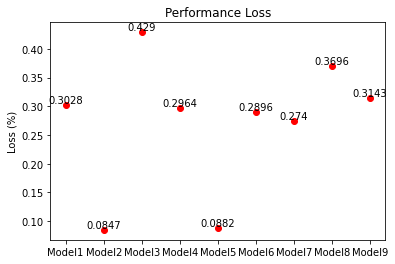

In [24]:
loss_dict = {'Model1': 0.3028, 'Model2': 0.0847, 'Model3': 0.4290, 'Model4': 0.2964,
             'Model5': 0.0882, 'Model6': 0.2896, 'Model7': 0.2740, 'Model8': 0.3696, 
             'Model9': 0.3143}

# Get model names and loss values as separate lists
models = list(loss_dict.keys())
losses = list(loss_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, losses, color='red')
plt.title('Performance Loss')
plt.ylabel('Loss (%)')

for (xi, yi) in zip(models, losses):
    plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()

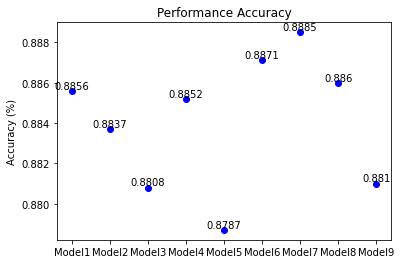

In [26]:
import matplotlib.pyplot as plt

# Create a dictionary with model names as keys and accuracy values as values
acc_dict = {'Model1': 0.8856, 'Model2': 0.8837, 'Model3': 0.8808, 'Model4': 0.8852,
            'Model5': 0.8787, 'Model6': 0.8871, 'Model7': 0.8885, 'Model8': 0.8860,
            'Model9': 0.8810}

# Get model names and accuracy values as separate lists
models = list(acc_dict.keys())
accuracy = list(acc_dict.values())

# Plot the scatter plot with labels
plt.scatter(models, accuracy, color='blue')
plt.title('Performance Accuracy')
plt.ylabel('Accuracy (%)')

for (xi, yi) in zip(models, accuracy):
  plt.text(xi, yi, str(yi), va='bottom', ha='center')

plt.show()